# Telecom Churn Analysis

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
telecom_data = pd.read_csv("customer_churn_dataset.csv")

In [3]:
telecom_data.head()

,customer_id,gender,age,marital_status,dependents,contract_type,internet_service,phone_service,multiple_lines,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,churn_status,call_duration_minutes,latitude,longitude
0,3850,Male,42,Married,3,Monthly,Fiber Optic,No,No,Yes,...,No,Yes,Yes,Yes,41.40,595.21,No,1062,-49.780269,-13.803970
1,4696,Female,76,Single,1,Yearly,DSL,No,Yes,Yes,...,No,Yes,Yes,No,46.20,940.05,No,901,56.553157,113.992914
2,5695,Female,39,Married,2,Monthly,Fiber Optic,Yes,No,Yes,...,No,No,Yes,No,43.05,919.62,No,928,80.762088,-27.906437
3,8712,Female,74,Single,3,Monthly,DSL,No,No,No,...,Yes,No,No,Yes,23.01,538.68,Yes,479,87.832819,86.922690
4,10506,Male,30,Married,3,Yearly,DSL,No,Yes,No,...,Yes,No,No,No,38.19,875.93,No,650,-88.373695,-29.320198


Checking the various attributes of data like shape(rows and columns), columns, datatypes

In [4]:
telecom_data.shape

(500, 21)

In [5]:
telecom_data.columns.values

array(['customer_id', 'gender', 'age', 'marital_status', 'dependents',
       'contract_type', 'internet_service', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'monthly_charges', 'total_charges',
       'churn_status', 'call_duration_minutes', 'latitude', 'longitude'],
      dtype=object)

Checking datatypes of all the columns

In [6]:
telecom_data.dtypes

customer_id                int64
gender                    object
age                        int64
marital_status            object
dependents                 int64
contract_type             object
internet_service          object
phone_service             object
multiple_lines            object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
monthly_charges          float64
total_charges            float64
churn_status              object
call_duration_minutes      int64
latitude                 float64
longitude                float64
dtype: object

Checking descriptive statistics of numeric variable

In [7]:
telecom_data.describe()

,customer_id,age,dependents,monthly_charges,total_charges,call_duration_minutes,latitude,longitude
count,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,519770.864000,48.442000,1.5440,51.535580,523.183180,596.786000,0.915006,0.081410
std,288105.287058,17.458185,1.1343,29.383052,296.521689,336.445591,51.909861,100.505525
min,3850.000000,18.000000,0.0000,0.140000,2.570000,3.000000,-88.373695,-178.645120
25%,266212.000000,33.000000,1.0000,25.990000,277.372500,317.750000,-42.374942,-85.098356
50%,532085.000000,49.000000,2.0000,51.665000,543.750000,613.000000,-0.745630,2.257802
75%,769655.500000,63.000000,3.0000,77.942500,783.802500,864.250000,46.173488,84.043319
max,997121.000000,77.000000,3.0000,99.660000,999.570000,1198.000000,89.999598,178.067051


In [8]:
telecom_data.drop (['customer_id','latitude','longitude'],axis = 1,inplace = True)

In [9]:
telecom_data.describe()

,age,dependents,monthly_charges,total_charges,call_duration_minutes
count,500.000000,500.0000,500.000000,500.000000,500.000000
mean,48.442000,1.5440,51.535580,523.183180,596.786000
std,17.458185,1.1343,29.383052,296.521689,336.445591
min,18.000000,0.0000,0.140000,2.570000,3.000000
25%,33.000000,1.0000,25.990000,277.372500,317.750000
50%,49.000000,2.0000,51.665000,543.750000,613.000000
75%,63.000000,3.0000,77.942500,783.802500,864.250000
max,77.000000,3.0000,99.660000,999.570000,1198.000000


The average age of customer are 48.44, we have 25% mid-age customers i.e 33 years and 75% of senior citizens i.e 77
Average monthly charges are 51.53 USD whereas 25% customers pay only half of the average value i.e 25.99 USD
75% of the customers are contributing to highest revenue i.e 783.802 USD

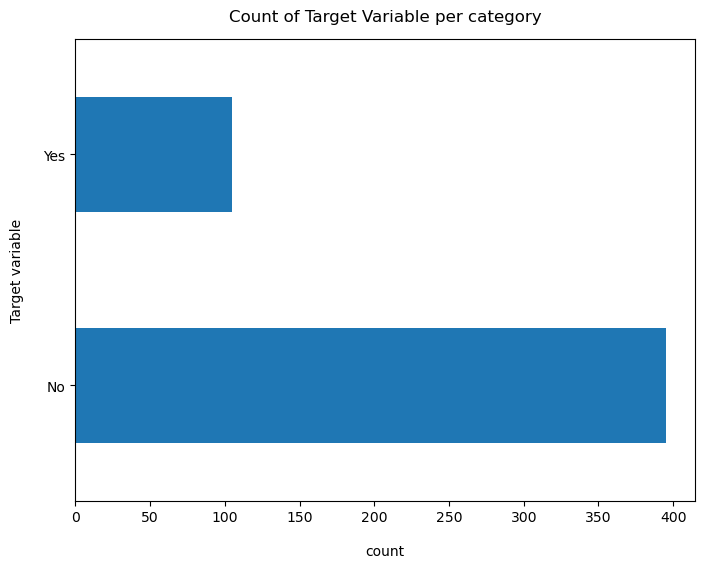

In [10]:
telecom_data['churn_status'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("count",labelpad=14)
plt.ylabel("Target variable",labelpad =14)
plt.title("Count of Target Variable per category",y = 1.02);

Total distibution of value counts in percentage for churn

In [11]:
100*telecom_data['churn_status'].value_counts()/len(telecom_data['churn_status'])

No     79.0
Yes    21.0
Name: churn_status, dtype: float64

In [12]:
telecom_data['churn_status'].value_counts()

No     395
Yes    105
Name: churn_status, dtype: int64

Data is highly imbalanced, ratio = 79:21
So we analyse the data with other features while taking the target values separately to get some insights.

In [13]:
#Concise summary of the dataframe as we have too many columns, we are using the verbose = True mode
telecom_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 500 non-null    object 
 1   age                    500 non-null    int64  
 2   marital_status         500 non-null    object 
 3   dependents             500 non-null    int64  
 4   contract_type          500 non-null    object 
 5   internet_service       500 non-null    object 
 6   phone_service          500 non-null    object 
 7   multiple_lines         500 non-null    object 
 8   online_security        500 non-null    object 
 9   online_backup          500 non-null    object 
 10  device_protection      500 non-null    object 
 11  tech_support           500 non-null    object 
 12  streaming_tv           500 non-null    object 
 13  streaming_movies       500 non-null    object 
 14  monthly_charges        500 non-null    float64
 15  total_

In [14]:
missing = pd.DataFrame((telecom_data.isnull().sum())*100/telecom_data.shape[0])


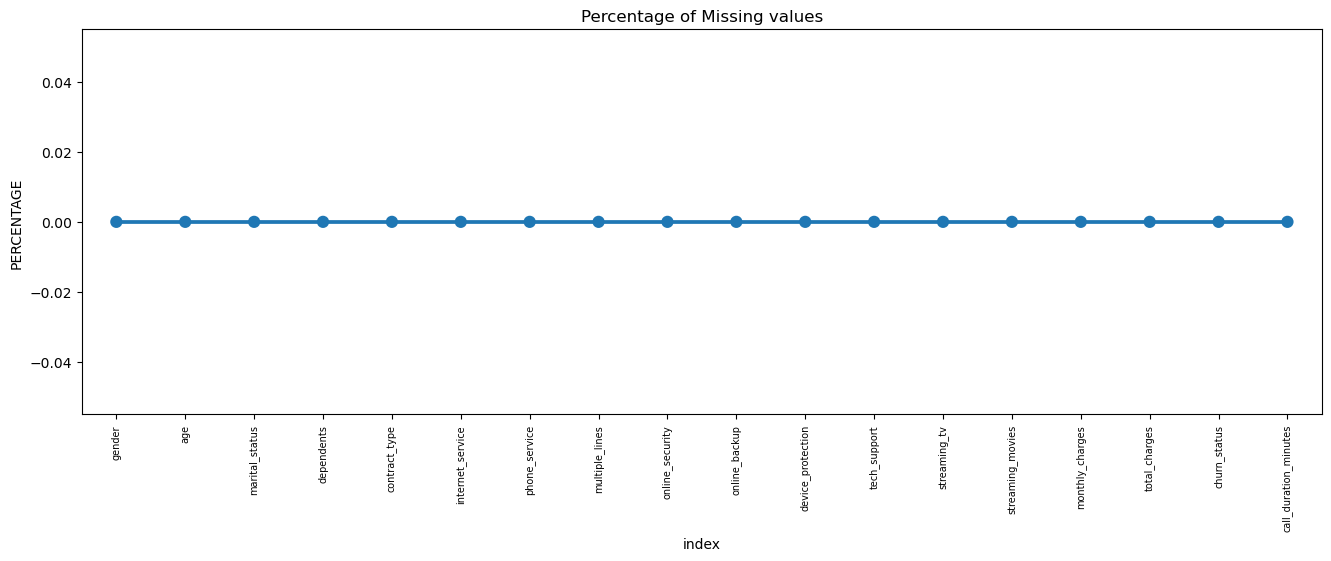

In [15]:
missing = pd.DataFrame((telecom_data.isnull().sum())*100/telecom_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x= 'index',y = 0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

we don't have missing data in the dataset

# Data Exploration

Plot distribution of individual predictors by churn

# Univariate Analysis

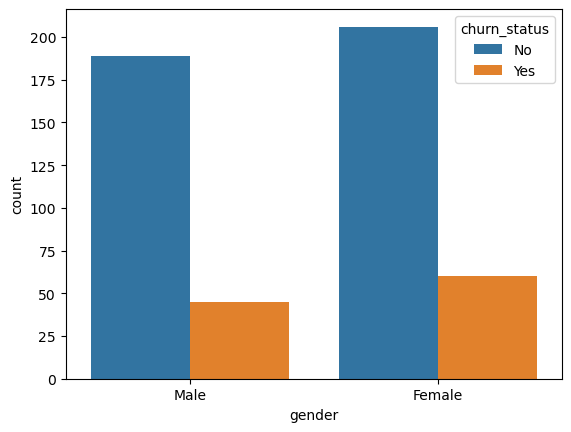

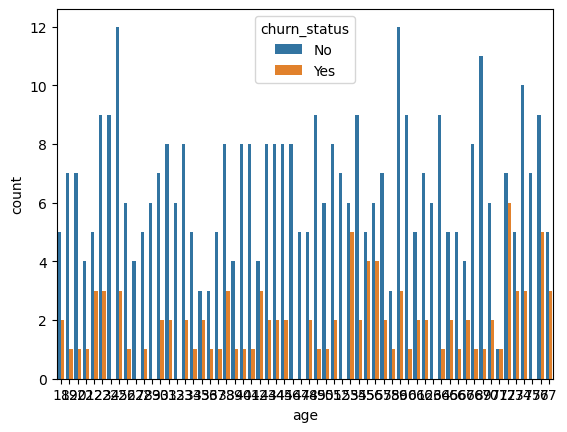

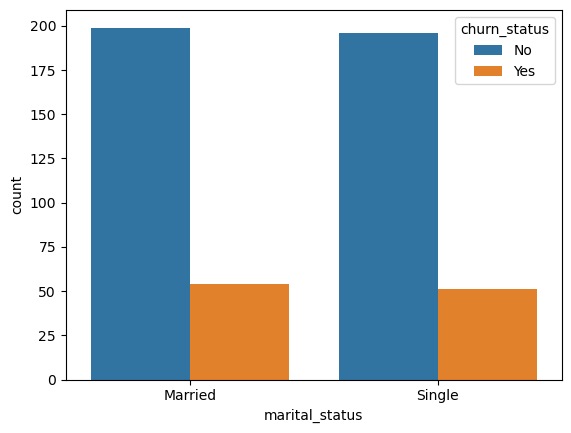

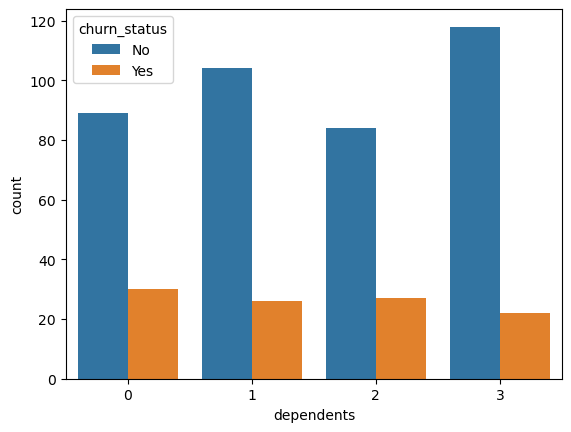

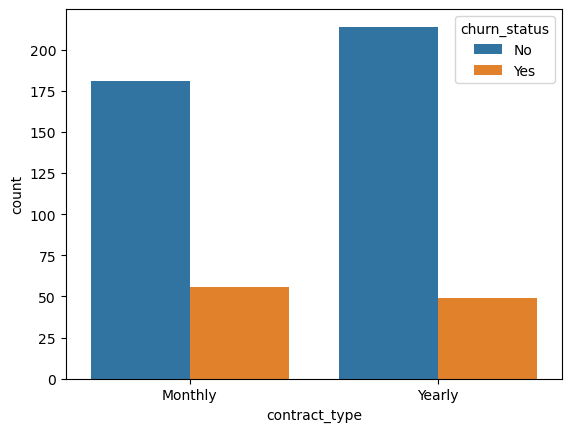

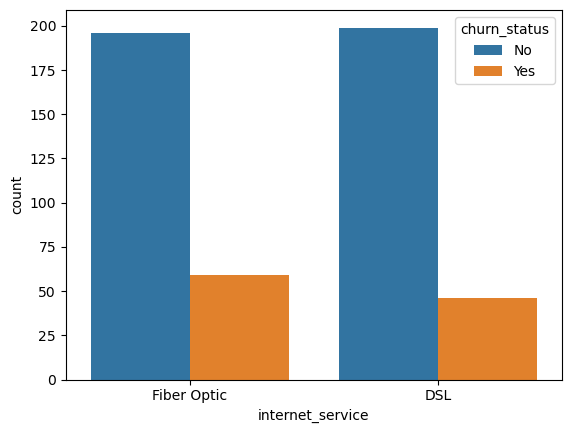

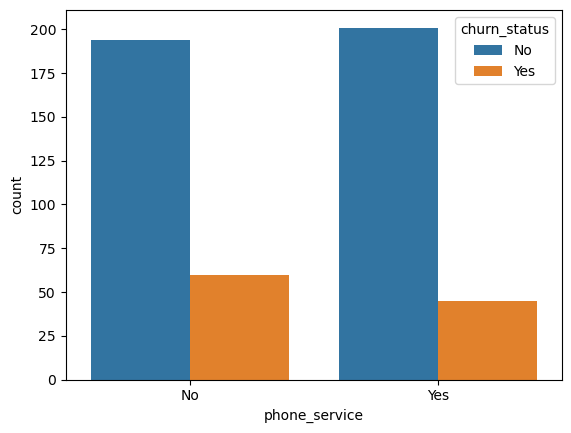

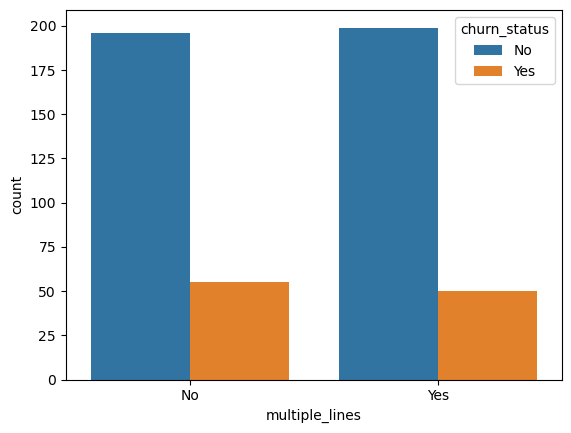

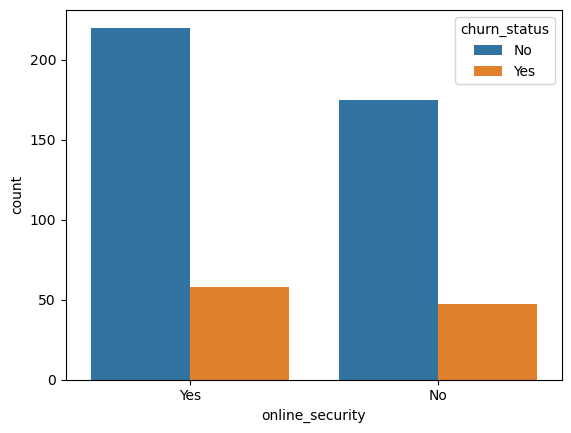

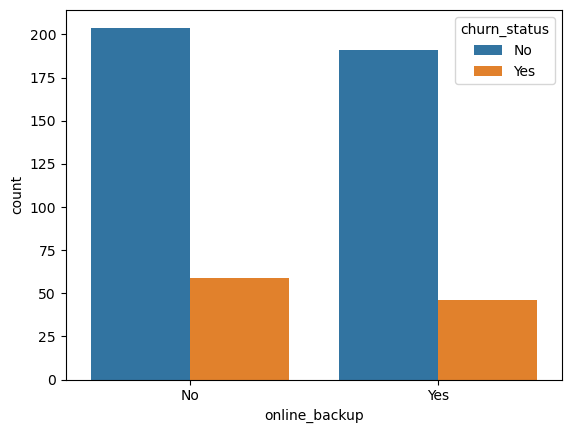

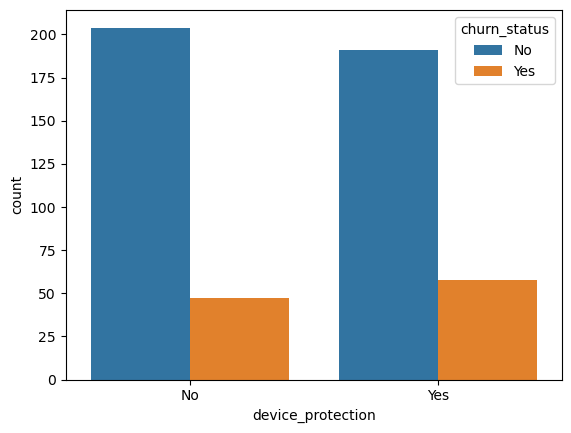

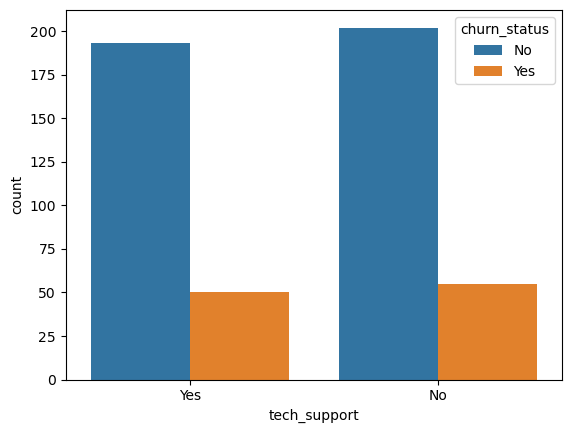

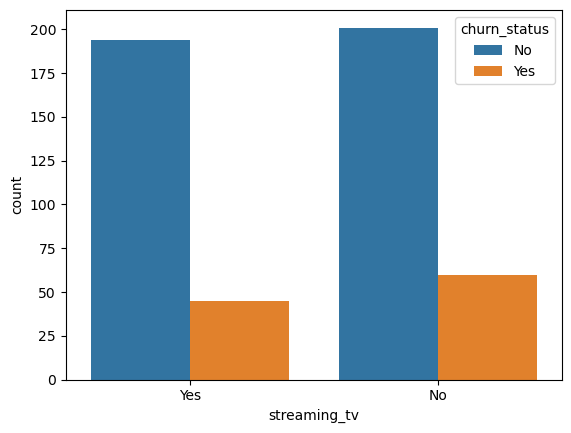

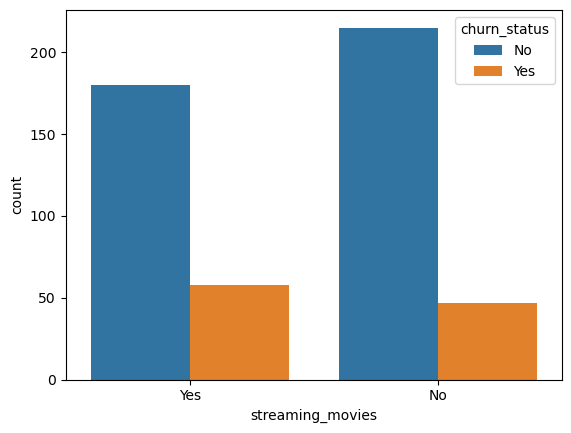

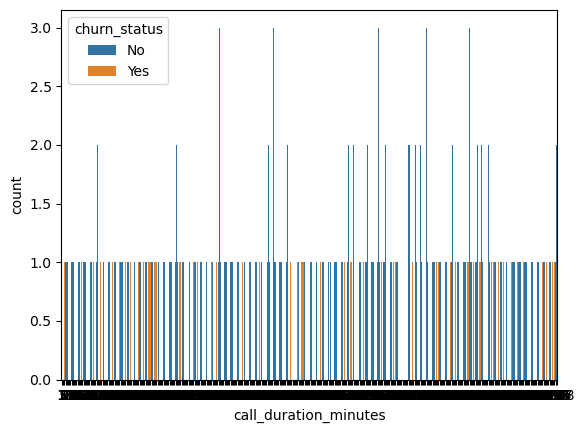

In [16]:
for i, predictor in enumerate(telecom_data.drop(columns=['churn_status', 'total_charges', 'monthly_charges'])):
    plt.figure(i)
    sns.countplot(data=telecom_data, x = predictor, hue = 'churn_status')

Convert the target variable 'churn status' in a binary numeric variable i.e Yes = 1, No = 0

In [17]:
telecom_data['churn_status'] = np.where(telecom_data.churn_status == 'Yes',1,0)
telecom_data

,gender,age,marital_status,dependents,contract_type,internet_service,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,churn_status,call_duration_minutes
0,Male,42,Married,3,Monthly,Fiber Optic,No,No,Yes,No,No,Yes,Yes,Yes,41.40,595.21,0,1062
1,Female,76,Single,1,Yearly,DSL,No,Yes,Yes,No,No,Yes,Yes,No,46.20,940.05,0,901
2,Female,39,Married,2,Monthly,Fiber Optic,Yes,No,Yes,Yes,No,No,Yes,No,43.05,919.62,0,928
3,Female,74,Single,3,Monthly,DSL,No,No,No,Yes,Yes,No,No,Yes,23.01,538.68,1,479
4,Male,30,Married,3,Yearly,DSL,No,Yes,No,No,Yes,No,No,No,38.19,875.93,0,650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Female,76,Married,2,Yearly,Fiber Optic,Yes,Yes,Yes,No,Yes,No,Yes,No,58.12,139.76,0,428
496,Male,76,Single,2,Monthly,Fiber Optic,Yes,Yes,Yes,No,Yes,Yes,Yes,No,81.67,434.50,0,370
497,Female,24,Married,0,Yearly,DSL,No,No,Yes,No,Yes,Yes,Yes,Yes,93.68,928.09,0,439
498,Male,43,Married,0,Yearly,Fiber Optic,Yes,Yes,No,No,No,Yes,Yes,No,85.05,998.00,0,238


Converting all categorical variables into dummy variables

In [18]:
telecom_data_dummies = pd.get_dummies(telecom_data)
telecom_data_dummies

,age,dependents,monthly_charges,total_charges,churn_status,call_duration_minutes,gender_Female,gender_Male,marital_status_Married,marital_status_Single,...,online_backup_No,online_backup_Yes,device_protection_No,device_protection_Yes,tech_support_No,tech_support_Yes,streaming_tv_No,streaming_tv_Yes,streaming_movies_No,streaming_movies_Yes
0,42,3,41.40,595.21,0,1062,0,1,1,0,...,1,0,1,0,0,1,0,1,0,1
1,76,1,46.20,940.05,0,901,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
2,39,2,43.05,919.62,0,928,1,0,1,0,...,0,1,1,0,1,0,0,1,1,0
3,74,3,23.01,538.68,1,479,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1
4,30,3,38.19,875.93,0,650,0,1,1,0,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,76,2,58.12,139.76,0,428,1,0,1,0,...,1,0,0,1,1,0,0,1,1,0
496,76,2,81.67,434.50,0,370,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
497,24,0,93.68,928.09,0,439,1,0,1,0,...,1,0,0,1,0,1,0,1,0,1
498,43,0,85.05,998.00,0,238,0,1,1,0,...,1,0,1,0,0,1,0,1,1,0


Relationship between monthly charges and Total charges

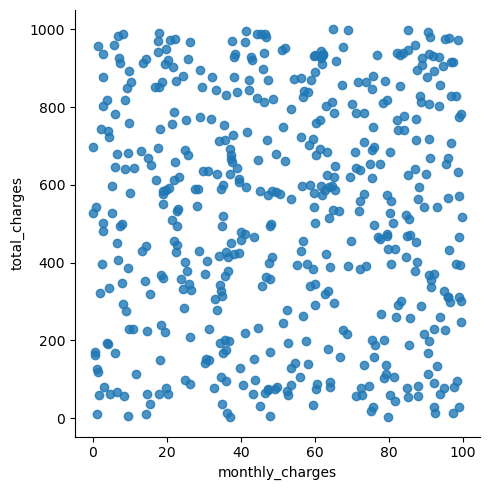

In [19]:
sns.lmplot(data=telecom_data_dummies, x='monthly_charges', y='total_charges', fit_reg=False)

The above chart shows that there is no specific corelation between Total_charges and monthly_charges

# Churn by monthly charges and total charges

C:\Users\ragha\AppData\Local\Temp\ipykernel_24612\2545174118.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telecom_data_dummies.monthly_charges[(telecom_data_dummies["churn_status"] == 0) ],
C:\Users\ragha\AppData\Local\Temp\ipykernel_24612\2545174118.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telecom_data_dummies.monthly_charges[(telecom_data_dummies["churn_status"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

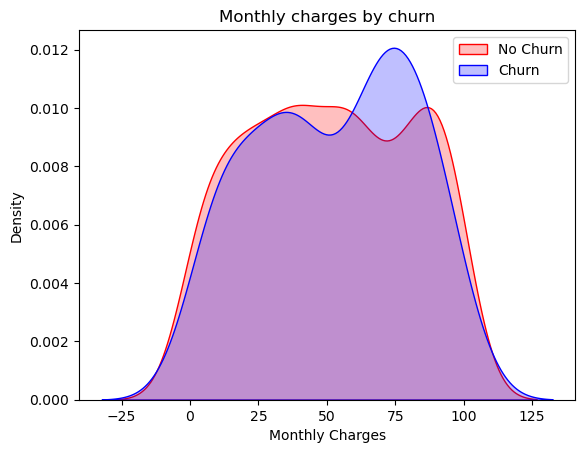

In [20]:
Mth = sns.kdeplot(telecom_data_dummies.monthly_charges[(telecom_data_dummies["churn_status"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telecom_data_dummies.monthly_charges[(telecom_data_dummies["churn_status"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

C:\Users\ragha\AppData\Local\Temp\ipykernel_24612\4160157317.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telecom_data_dummies.total_charges[(telecom_data_dummies["churn_status"] == 0) ],
C:\Users\ragha\AppData\Local\Temp\ipykernel_24612\4160157317.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telecom_data_dummies.total_charges[(telecom_data_dummies["churn_status"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

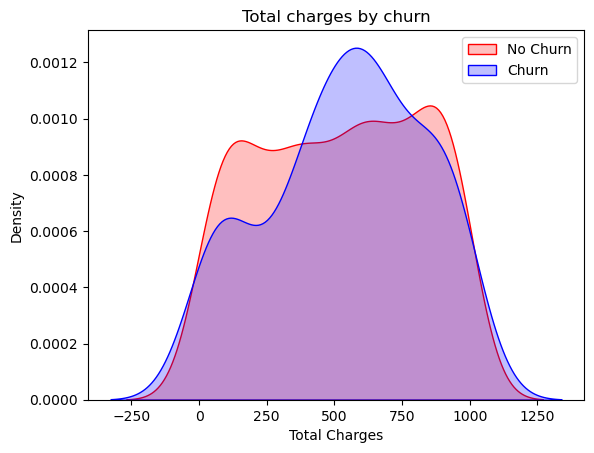

In [21]:
Tot = sns.kdeplot(telecom_data_dummies.total_charges[(telecom_data_dummies["churn_status"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telecom_data_dummies.total_charges[(telecom_data_dummies["churn_status"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Surprising insight: Higher churn at mid Total charge
    

Build a corelation of all predictors with churn

<Axes: >

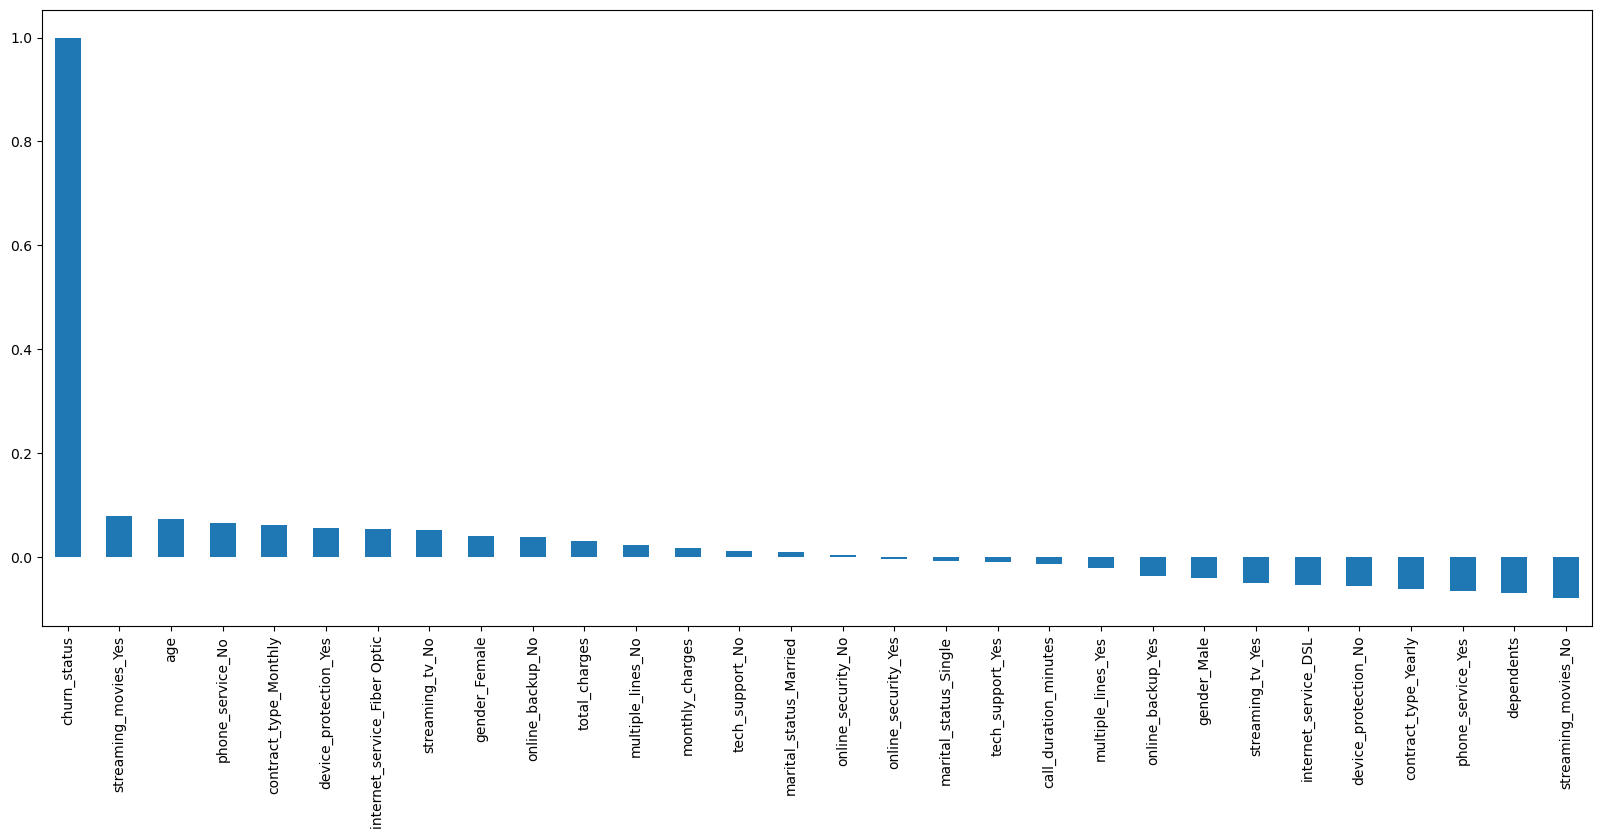

In [23]:
plt.figure(figsize=(20,8))
telecom_data_dummies.corr()['churn_status'].sort_values(ascending = False).plot(kind='bar')

Derived insights
High churn seen in case of streaming movies, age, phone service, device protection and fiber optics.
Low churn seen in case of gender male, streaming tv, with internet srvice DSL, Customers with yearly contract
Factors like marital status, online security have almost no impact on churn
this can also be seen with a heatmap below

<Axes: >

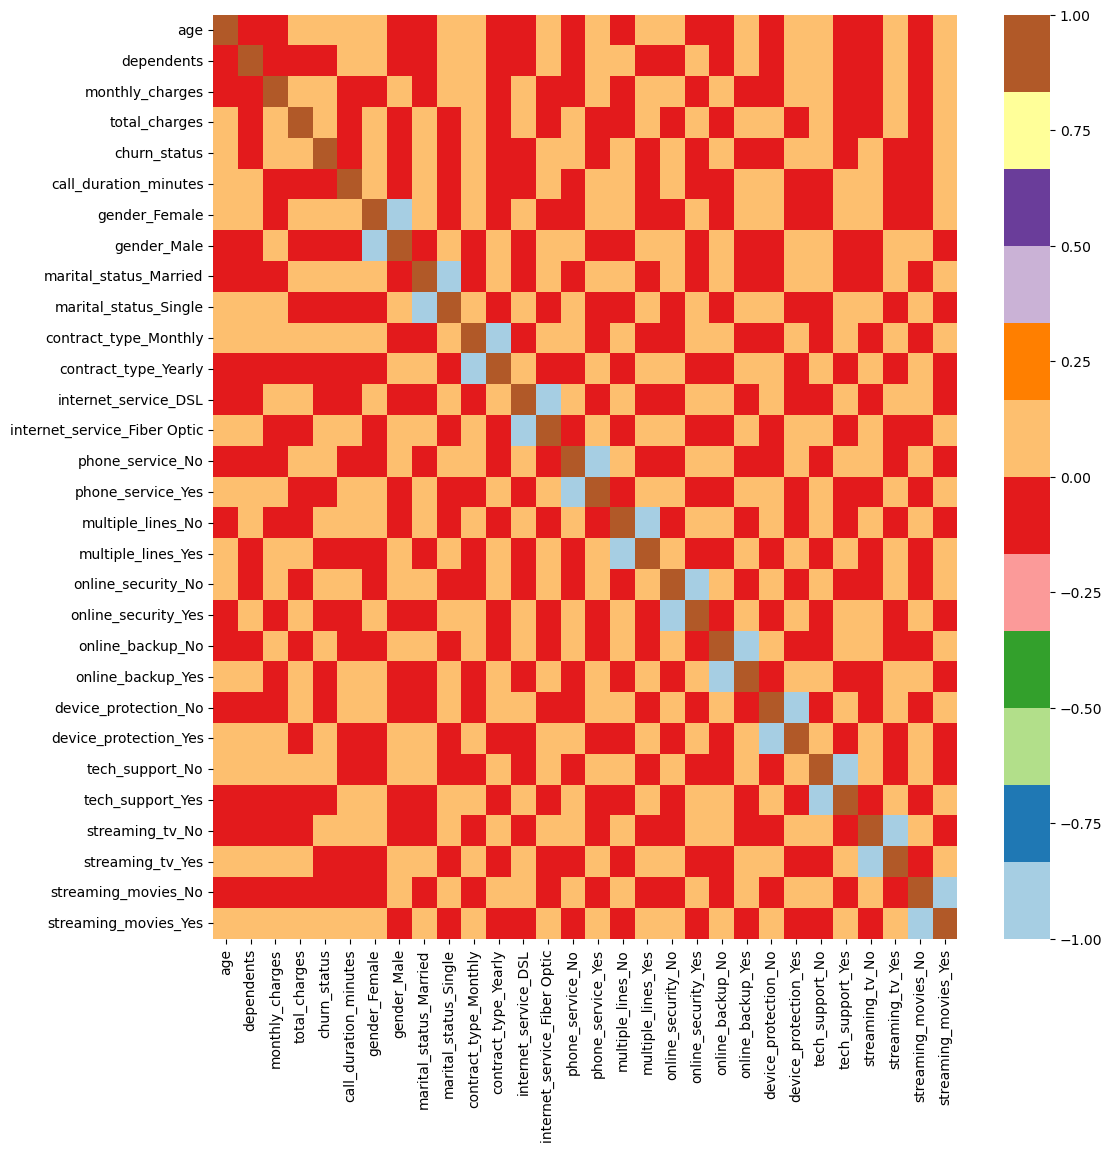

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(telecom_data_dummies.corr(), cmap="Paired")

# Bivariate Analysis

In [26]:
new_df1_target0=telecom_data.loc[telecom_data["churn_status"]==0]
new_df1_target1=telecom_data.loc[telecom_data["churn_status"]==1]

In [27]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

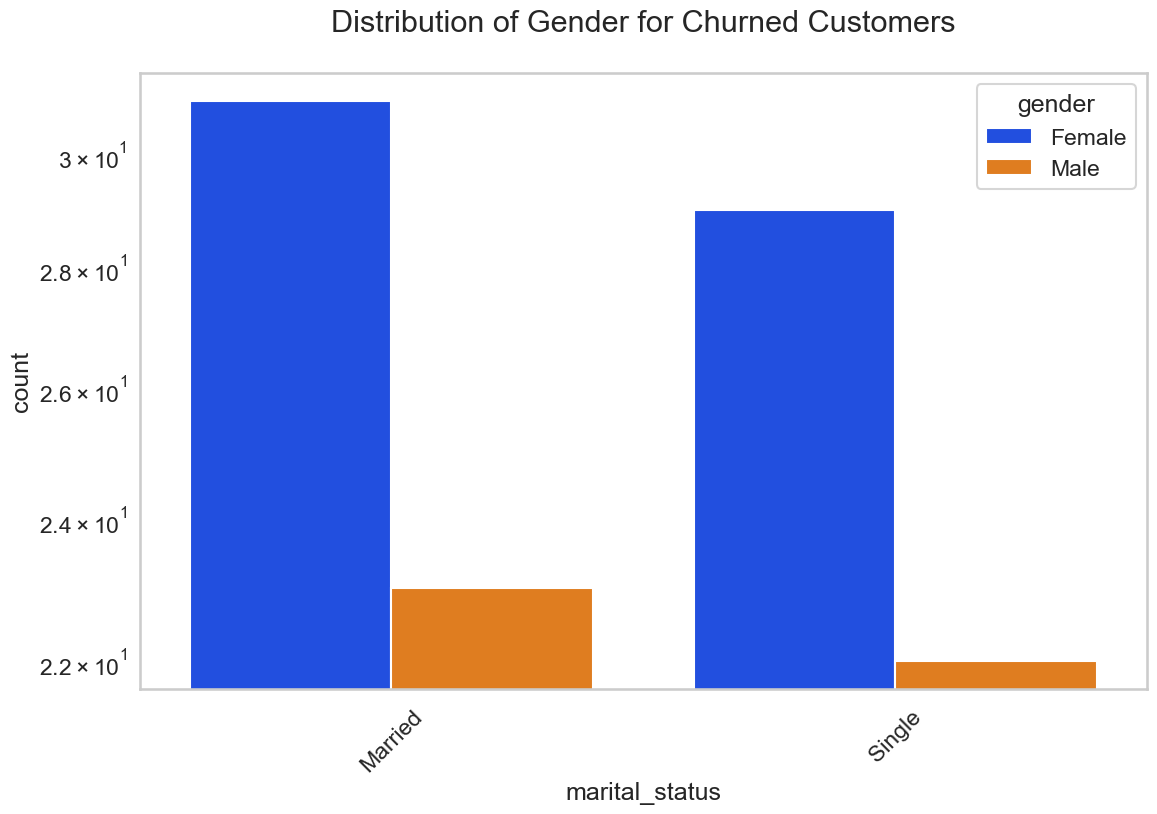

In [28]:
uniplot(new_df1_target1,col='marital_status',title='Distribution of Gender for Churned Customers',hue='gender')

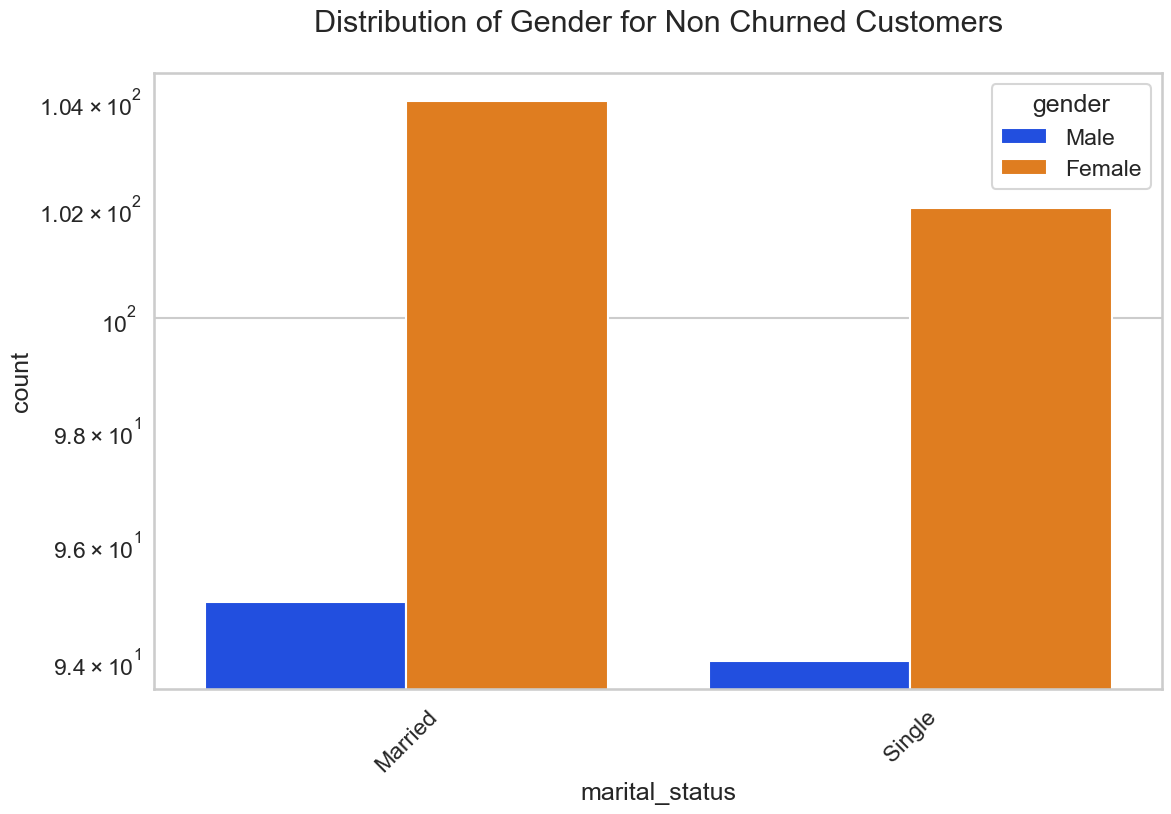

In [29]:
uniplot(new_df1_target0,col='marital_status',title='Distribution of Gender for Non Churned Customers',hue='gender')

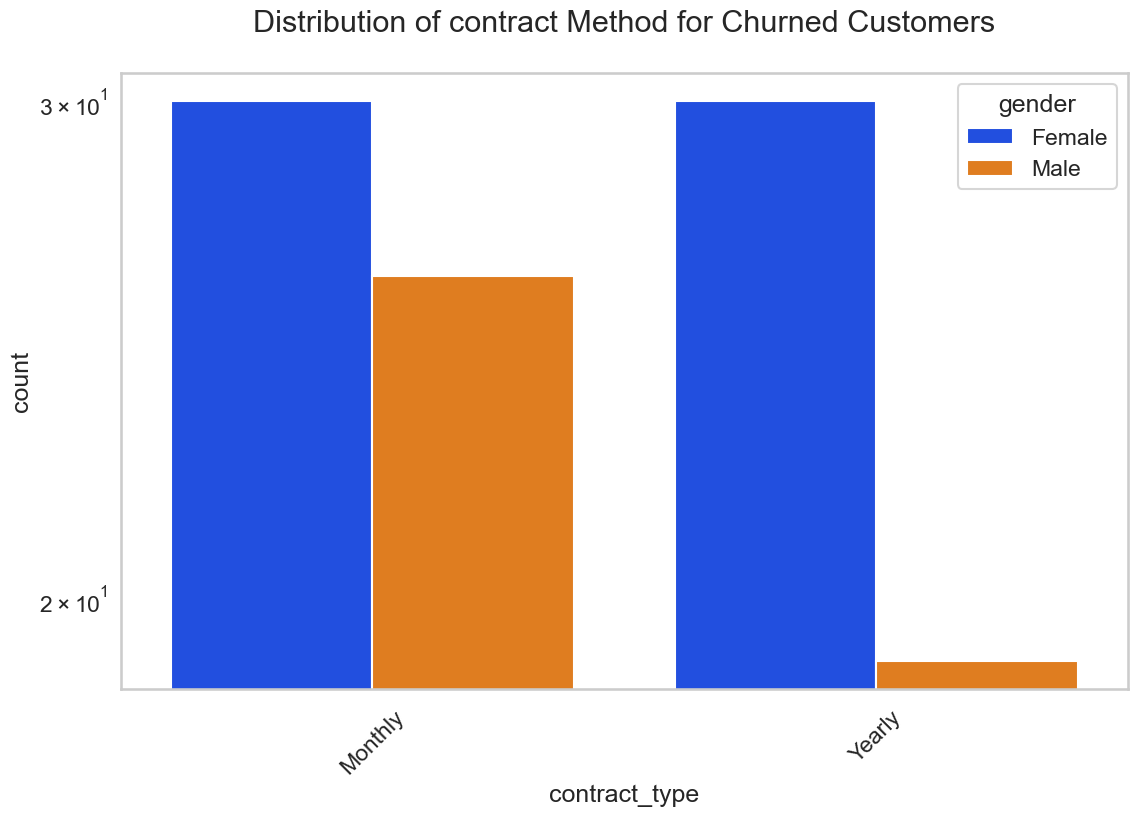

In [30]:
uniplot(new_df1_target1,col='contract_type',title='Distribution of contract Method for Churned Customers',hue='gender')

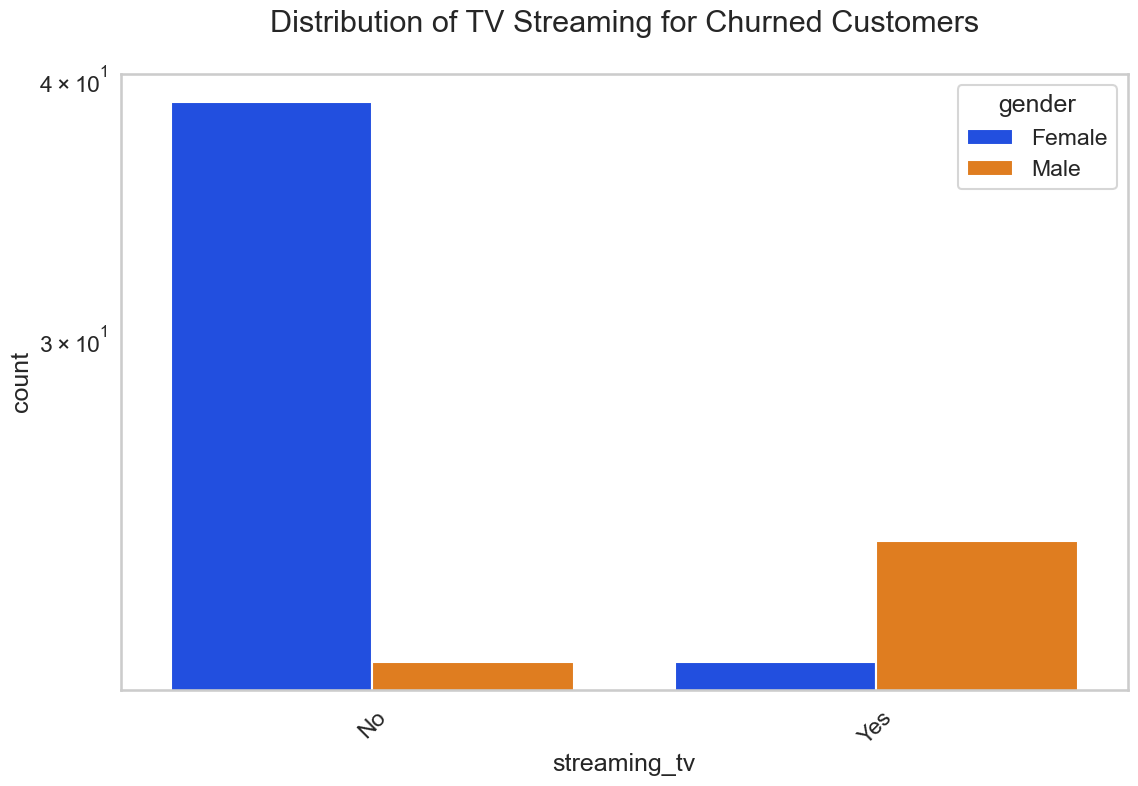

In [31]:
uniplot(new_df1_target1,col='streaming_tv',title='Distribution of TV Streaming for Churned Customers',hue='gender')

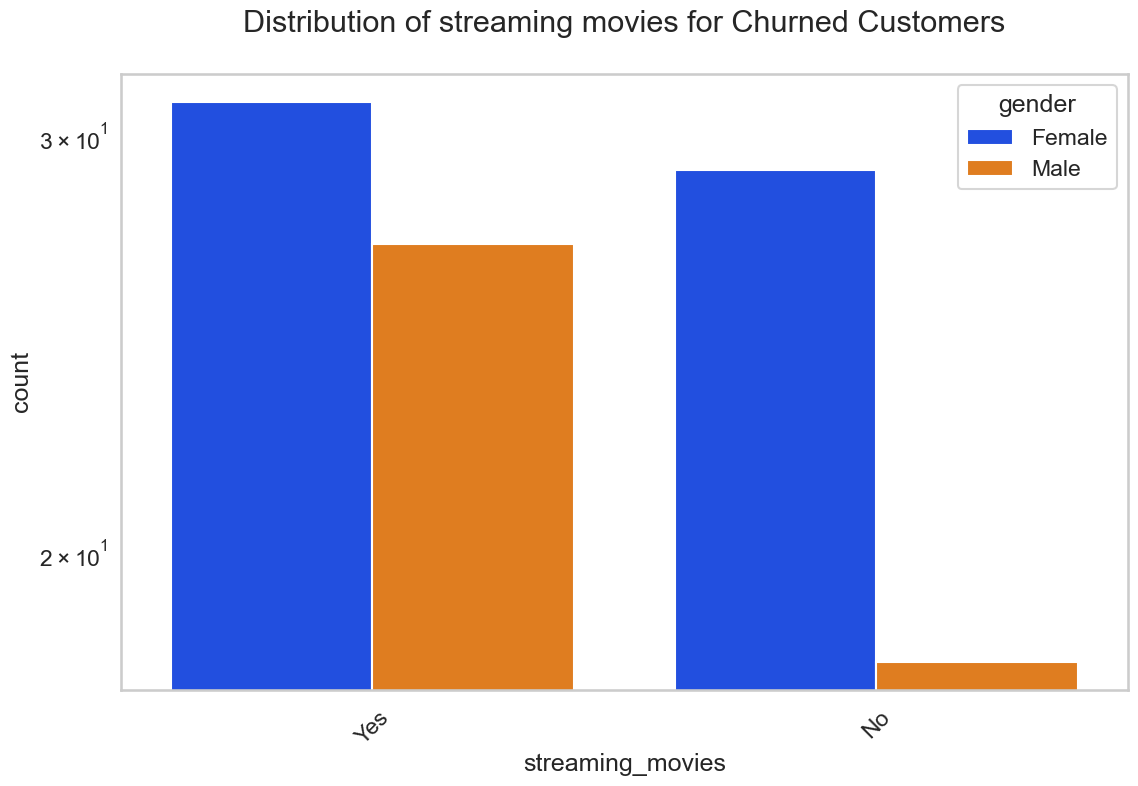

In [32]:
uniplot(new_df1_target1,col='streaming_movies',title='Distribution of streaming movies for Churned Customers',hue='gender')

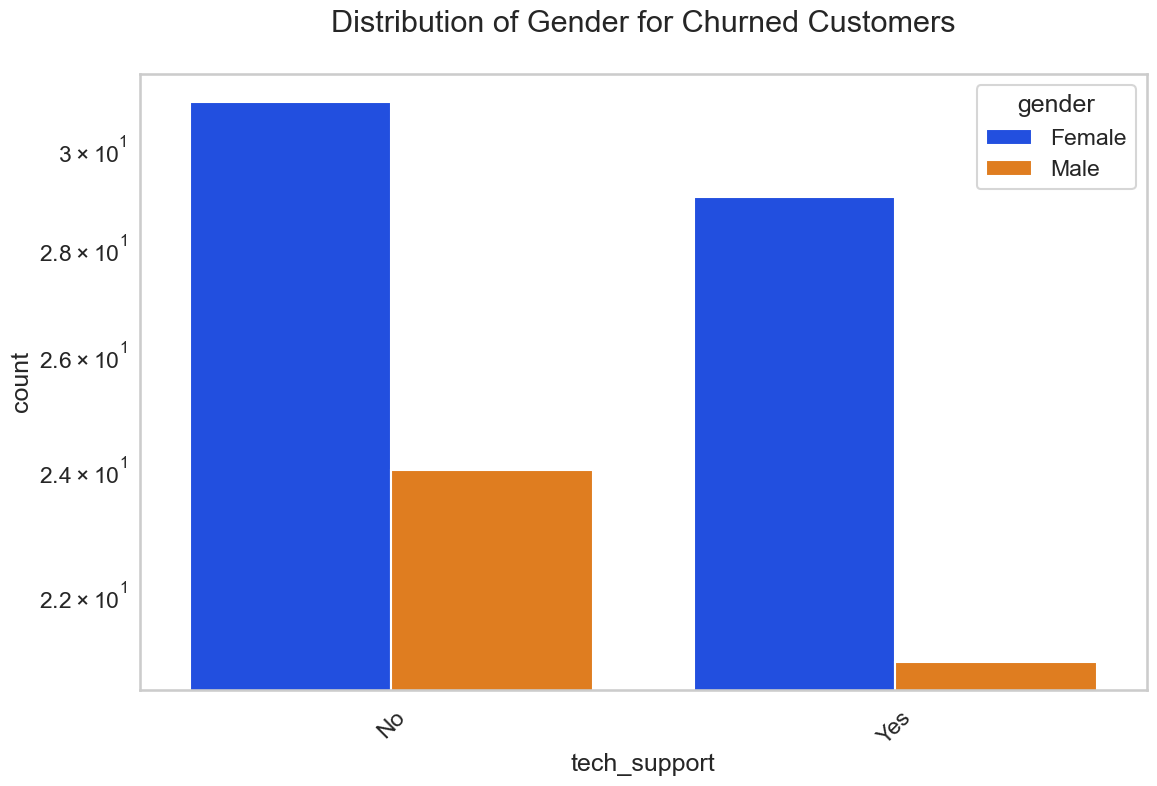

In [33]:
uniplot(new_df1_target1,col='tech_support',title='Distribution of Gender for Churned Customers',hue='gender')

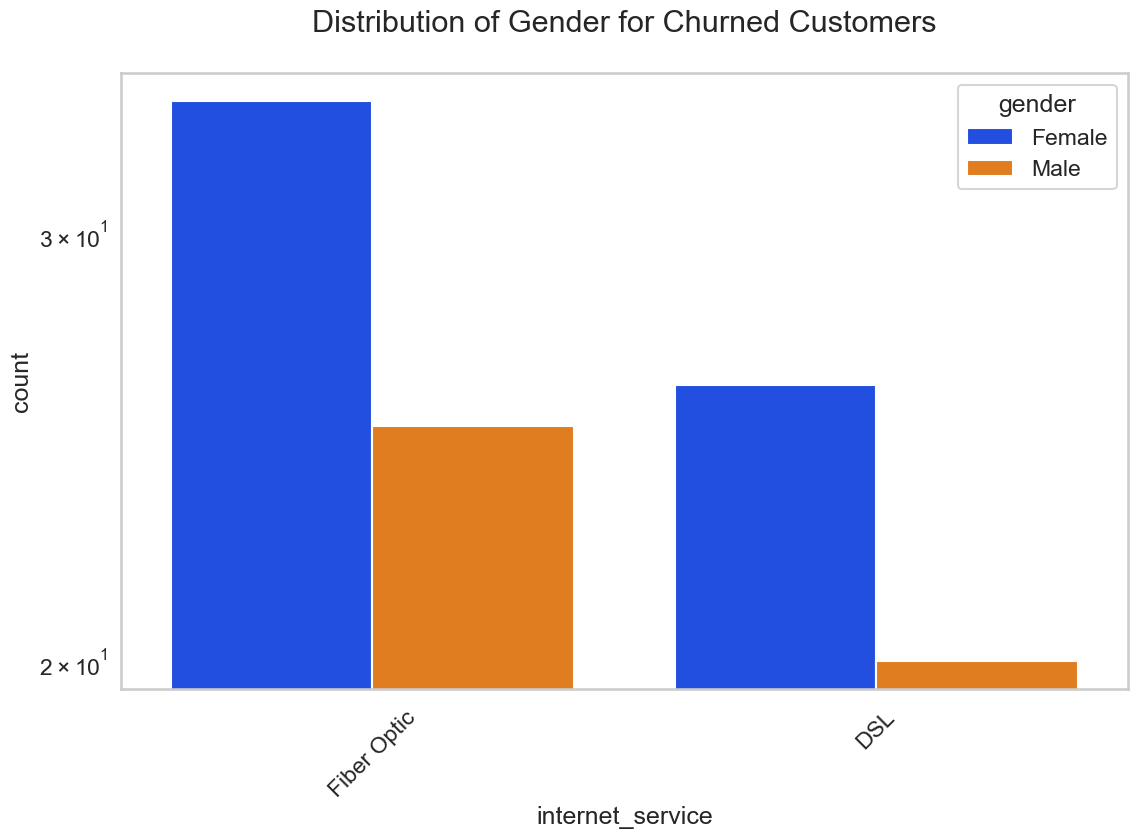

In [34]:
uniplot(new_df1_target1,col='internet_service',title='Distribution of Gender for Churned Customers',hue='gender')

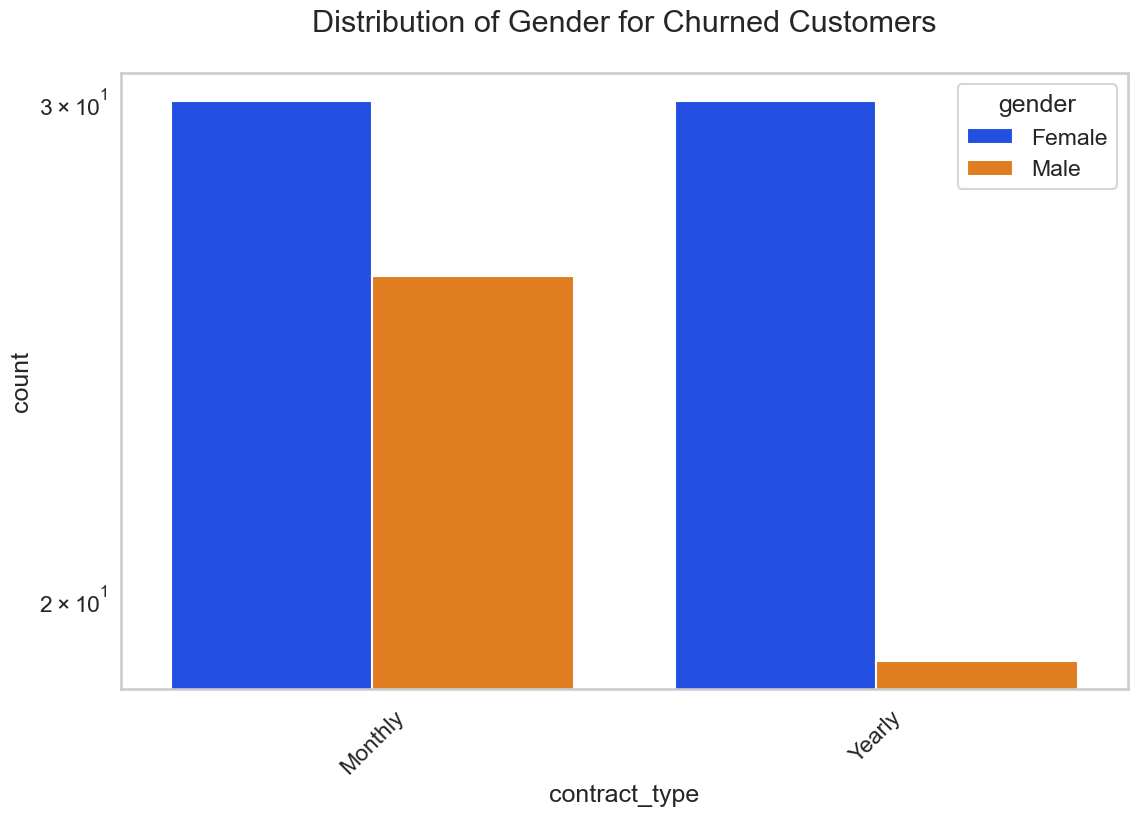

In [35]:
uniplot(new_df1_target1,col='contract_type',title='Distribution of Gender for Churned Customers',hue='gender')

# CONCLUSION

1. Customers without tech support and internet service churns more.

2. Monthly contract types are more likely to churn as they have small duration service facility. 

3. Customers with less streaming behaviour tend to churn more

In [ ]:
telecom_data_dummies.to_csv('tel_churn.csv')